# Histogram management of an image

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
#testImage = './Test_Images/NGC7000.tif'
testImage = '/mnt/data/Photos/Repository/2018/08-Astro_Test/JPB-8F7_ZGYN.pgm'

In [12]:
#image = cv2.imread(testImage, cv2.IMREAD_ANYDEPTH | cv2.IMREAD_ANYCOLOR)
image = cv2.imread(testImage, cv2.IMREAD_IGNORE_ORIENTATION | cv2.IMREAD_ANYDEPTH | cv2.IMREAD_ANYCOLOR)

In [16]:
image = cv2.cvtColor(image, cv2.COLOR_BayerBG2BGR)

In [22]:
def normalizationRange(data, sigmaMult=2):
    dataMean = data.mean()
    dataStd = data.std()
    return(data.mean() - data.std()*sigmaMult, data.mean() + data.std()*sigmaMult)

In [23]:
image = image.astype(np.float32)

In [24]:
image /= image.max()

In [25]:
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB);

In [26]:
lab_image

array([[[ 1.28173828,  1.921875  ,  1.953125  ],
        [ 1.28173828,  1.921875  ,  1.953125  ],
        [ 0.84838867,  1.296875  ,  0.875     ],
        ..., 
        [ 1.11083984,  0.640625  ,  0.65625   ],
        [ 1.34277344, -0.21875   ,  0.984375  ],
        [ 1.34277344, -0.21875   ,  0.984375  ]],

       [[ 1.28173828,  1.921875  ,  1.953125  ],
        [ 1.28173828,  1.921875  ,  1.953125  ],
        [ 0.84838867,  1.296875  ,  0.875     ],
        ..., 
        [ 1.11083984,  0.640625  ,  0.65625   ],
        [ 1.34277344, -0.21875   ,  0.984375  ],
        [ 1.34277344, -0.21875   ,  0.984375  ]],

       [[ 1.30004883,  1.40625   ,  1.5625    ],
        [ 1.30004883,  1.40625   ,  1.5625    ],
        [ 1.00097656,  0.765625  ,  0.703125  ],
        ..., 
        [ 1.22070312,  1.109375  ,  1.03125   ],
        [ 1.59912109,  0.9375    ,  1.1875    ],
        [ 1.59912109,  0.9375    ,  1.1875    ]],

       ..., 
       [[ 0.51879883,  0.53125   , -0.234375  ],
        

In [27]:
l, a, b = cv2.split(lab_image)

In [28]:
l

array([[ 1.28173828,  1.28173828,  0.84838867, ...,  1.11083984,
         1.34277344,  1.34277344],
       [ 1.28173828,  1.28173828,  0.84838867, ...,  1.11083984,
         1.34277344,  1.34277344],
       [ 1.30004883,  1.30004883,  1.00097656, ...,  1.22070312,
         1.59912109,  1.59912109],
       ..., 
       [ 0.51879883,  0.51879883,  0.67138672, ...,  0.8972168 ,
         0.78125   ,  0.78125   ],
       [ 0.84838867,  0.84838867,  1.02539062, ...,  1.00097656,
         0.83618164,  0.83618164],
       [ 0.84838867,  0.84838867,  1.02539062, ...,  1.00097656,
         0.83618164,  0.83618164]], dtype=float32)

(array([  1.79584520e+07,   3.55510000e+04,   1.46990000e+04,
          6.55600000e+03,   3.07600000e+03,   2.52400000e+03,
          1.33400000e+03,   7.96000000e+02,   7.20000000e+02,
          1.22200000e+03]),
 array([  6.71386719e-02,   1.00604248e+01,   2.00537109e+01,
          3.00469971e+01,   4.00402832e+01,   5.00335693e+01,
          6.00268555e+01,   7.00201416e+01,   8.00134277e+01,
          9.00067139e+01,   1.00000000e+02]),
 <a list of 10 Patch objects>)

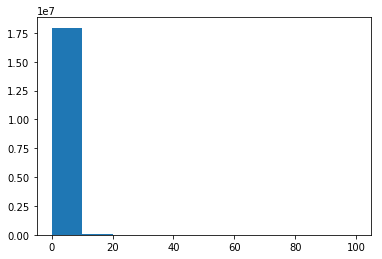

In [29]:
plt.hist(l.flatten())

In [30]:
normalization = normalizationRange(l, 3)

In [31]:
normalization

(-4.3946187496185303, 7.0055406093597412)

In [32]:
l

array([[ 1.28173828,  1.28173828,  0.84838867, ...,  1.11083984,
         1.34277344,  1.34277344],
       [ 1.28173828,  1.28173828,  0.84838867, ...,  1.11083984,
         1.34277344,  1.34277344],
       [ 1.30004883,  1.30004883,  1.00097656, ...,  1.22070312,
         1.59912109,  1.59912109],
       ..., 
       [ 0.51879883,  0.51879883,  0.67138672, ...,  0.8972168 ,
         0.78125   ,  0.78125   ],
       [ 0.84838867,  0.84838867,  1.02539062, ...,  1.00097656,
         0.83618164,  0.83618164],
       [ 0.84838867,  0.84838867,  1.02539062, ...,  1.00097656,
         0.83618164,  0.83618164]], dtype=float32)

In [33]:
def process(elem, normalization):
    if elem < normalization[0]:
        return normalization[0]
    elif elem > normalization[1]:
        return normalization[1]
    else:
        return elem

In [34]:
res = np.array([[process(elem, normalization) for elem in line] for line in l])

In [35]:
res

array([[ 1.28173828,  1.28173828,  0.84838867, ...,  1.11083984,
         1.34277344,  1.34277344],
       [ 1.28173828,  1.28173828,  0.84838867, ...,  1.11083984,
         1.34277344,  1.34277344],
       [ 1.30004883,  1.30004883,  1.00097656, ...,  1.22070312,
         1.59912109,  1.59912109],
       ..., 
       [ 0.51879883,  0.51879883,  0.67138672, ...,  0.8972168 ,
         0.78125   ,  0.78125   ],
       [ 0.84838867,  0.84838867,  1.02539062, ...,  1.00097656,
         0.83618164,  0.83618164],
       [ 0.84838867,  0.84838867,  1.02539062, ...,  1.00097656,
         0.83618164,  0.83618164]])

In [36]:
res.max()

7.0055406093597412

In [37]:
res = res - res.min()

In [38]:
res = res * 100/res.max()

In [39]:
res = res.astype(np.float32, copy=False)

In [40]:
res

array([[ 17.50546646,  17.50546646,  11.2597971 , ...,  15.0423851 ,
         18.38513756,  18.38513756],
       [ 17.50546646,  17.50546646,  11.2597971 , ...,  15.0423851 ,
         18.38513756,  18.38513756],
       [ 17.76936722,  17.76936722,  13.45897675, ...,  16.62579536,
         22.0797596 ,  22.0797596 ],
       ..., 
       [  6.5095706 ,   6.5095706 ,   8.70874977, ...,  11.96353436,
         10.29215813,  10.29215813],
       [ 11.2597971 ,  11.2597971 ,  13.81084538, ...,  13.45897675,
         11.08386326,  11.08386326],
       [ 11.2597971 ,  11.2597971 ,  13.81084538, ...,  13.45897675,
         11.08386326,  11.08386326]], dtype=float32)

In [41]:
l

array([[ 1.28173828,  1.28173828,  0.84838867, ...,  1.11083984,
         1.34277344,  1.34277344],
       [ 1.28173828,  1.28173828,  0.84838867, ...,  1.11083984,
         1.34277344,  1.34277344],
       [ 1.30004883,  1.30004883,  1.00097656, ...,  1.22070312,
         1.59912109,  1.59912109],
       ..., 
       [ 0.51879883,  0.51879883,  0.67138672, ...,  0.8972168 ,
         0.78125   ,  0.78125   ],
       [ 0.84838867,  0.84838867,  1.02539062, ...,  1.00097656,
         0.83618164,  0.83618164],
       [ 0.84838867,  0.84838867,  1.02539062, ...,  1.00097656,
         0.83618164,  0.83618164]], dtype=float32)

In [52]:
l.max()

100.0

(array([  8.10656000e+05,   1.45724870e+07,   2.10543800e+06,
          2.39764000e+05,   8.65800000e+04,   4.47410000e+04,
          2.79260000e+04,   1.83590000e+04,   1.37460000e+04,
          1.05233000e+05]),
 array([   0.,   10.,   20.,   30.,   40.,   50.,   60.,   70.,   80.,
          90.,  100.]),
 <a list of 10 Patch objects>)

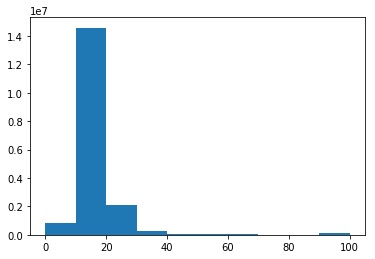

In [42]:
plt.hist(res.flatten())

In [43]:
lab_image = cv2.merge((res,a,b))

In [44]:
lab_image.max()

100.0

In [45]:
RGB_image = cv2.cvtColor(lab_image, cv2.COLOR_LAB2BGR);

In [46]:
RGB_image

array([[[ 0.15773602,  0.16446529,  0.18416096],
        [ 0.15773602,  0.16446529,  0.18416096],
        [ 0.11312396,  0.11519651,  0.12682678],
        ..., 
        [ 0.14454283,  0.14679016,  0.15339102],
        [ 0.17021352,  0.17592934,  0.1769937 ],
        [ 0.17021352,  0.17592934,  0.1769937 ]],

       [[ 0.15773602,  0.16446529,  0.18416096],
        [ 0.15773602,  0.16446529,  0.18416096],
        [ 0.11312396,  0.11519651,  0.12682678],
        ..., 
        [ 0.14454283,  0.14679016,  0.15339102],
        [ 0.17021352,  0.17592934,  0.1769937 ],
        [ 0.17021352,  0.17592934,  0.1769937 ]],

       [[ 0.16203639,  0.16770376,  0.18261653],
        [ 0.16203639,  0.16770376,  0.18261653],
        [ 0.13148552,  0.1337128 ,  0.14126381],
        ..., 
        [ 0.15550472,  0.15887398,  0.17007864],
        [ 0.20042796,  0.2051405 ,  0.21590006],
        [ 0.20042796,  0.2051405 ,  0.21590006]],

       ..., 
       [[ 0.08149305,  0.07916049,  0.08270293],
        

In [47]:
RGB_image *= 2**16 - 1

In [48]:
RGB_image = cv2.cvtColor(RGB_image, cv2.COLOR_BGR2RGB);

In [49]:
RGB_image.max()

65535.0

In [50]:
image2 = RGB_image.astype(np.uint16)
cv2.imwrite('image.png', image2)

True